In [ ]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu,sigmoid

**Import the path file**

In [ ]:
from glob import glob
glob('/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/training_set/*')

['/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/training_set/dogs',
 '/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/training_set/cats']

In [ ]:
from glob import glob
glob('/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/test_set*')

['/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/test_set']

Found 8005 images belonging to 2 classes.
Found 2033 images belonging to 2 classes.
Epoch 1/10
251/251 [==============================] - 46s 169ms/step - loss: 0.6909 - Accuracy: 0.5307
Epoch 2/10
251/251 [==============================] - 43s 173ms/step - loss: 0.6637 - Accuracy: 0.6069
Epoch 3/10
251/251 [==============================] - 42s 168ms/step - loss: 0.6305 - Accuracy: 0.6461
Epoch 4/10
251/251 [==============================] - 43s 171ms/step - loss: 0.5888 - Accuracy: 0.6897
Epoch 5/10
251/251 [==============================] - 42s 168ms/step - loss: 0.5577 - Accuracy: 0.7157
Epoch 6/10
251/251 [==============================] - 42s 168ms/step - loss: 0.5327 - Accuracy: 0.7333
Epoch 7/10
251/251 [==============================] - 44s 174ms/step - loss: 0.5084 - Accuracy: 0.7474
Epoch 8/10
251/251 [==============================] - 42s 169ms/step - loss: 0.4822 - Accuracy: 0.7710
Epoch 9/10
251/251 [==============================] - 42s 168ms/step - loss: 0.4686 - Accura

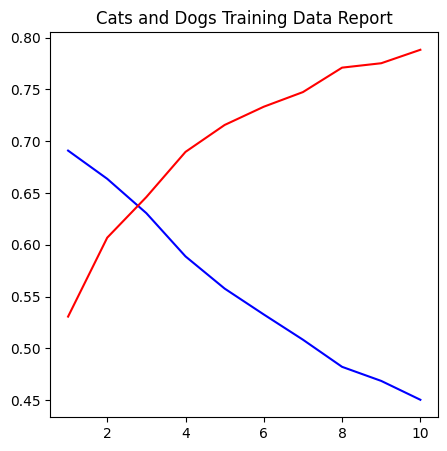

[[[ 52  70  82]
  [ 52  70  82]
  [ 52  70  82]
  ...
  [ 57  78  97]
  [ 57  78  97]
  [ 59  80  99]]

 [[ 52  70  82]
  [ 52  70  82]
  [ 52  70  82]
  ...
  [ 57  78  97]
  [ 57  78  97]
  [ 59  80  99]]

 [[ 52  70  82]
  [ 52  70  82]
  [ 52  70  82]
  ...
  [ 58  79  98]
  [ 58  79  98]
  [ 59  80  99]]

 ...

 [[104 133 147]
  [106 135 149]
  [107 135 149]
  ...
  [137 103  91]
  [137 104  89]
  [138 105  90]]

 [[102 128 141]
  [107 130 144]
  [111 133 147]
  ...
  [135  99  85]
  [140 104  88]
  [142 109  92]]

 [[101 125 137]
  [105 127 140]
  [112 129 145]
  ...
  [135  99  83]
  [141 105  89]
  [142 109  92]]]
(306, 337, 3)
original image: (306, 337, 3)
(100, 100, 3)
1/1 [==============================] - 0s 229ms/step
[[0.97458696]]
this image is Dog
original image: (375, 499, 3)
(100, 100, 3)
1/1 [==============================] - 0s 24ms/step
[[0.43534034]]
this image is Cat


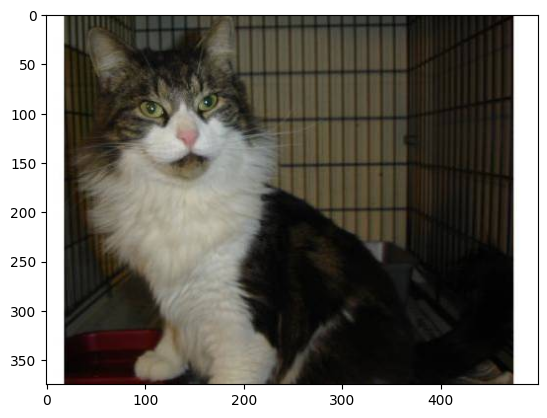

In [ ]:
class CNN:
  def __init__(self,path):
    self.path=path
    self.Train_data_path='/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/training_set'
    self.Test_data_path='/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/test_set'
    self.image_height,self.image_width=100,100#Set the fixed size so while modeling images its easy to understand


  def EDA_validation(self,model):
    try:
      Training_accuracy=model.history.history['Accuracy']
      Training_loss=model.history.history['loss']
      plt.figure(figsize = (5,5))
      plt.plot(np.arange(1,11),Training_loss,color='b',label='accuracy')
      plt.plot(np.arange(1,11),Training_accuracy,color='r',label='loss')
      plt.title('Cats and Dogs Training Data Report')
      plt.show()
      # Lets take the cat or dog image and check it
      image=plt.imread('/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/training_set/dogs/dog.77.jpg')
      print(image)
      print(image.shape)
      #plt.imshow(image)
      def prediction(path):
        image_1=cv2.imread(path)
        print('original image:',image_1.shape)
        # Take the size with same training data
        image_1=cv2.resize(image_1,(100,100))
        print(image_1.shape)
        # since the training was done with pixel values after scaling down to 0 - 1 so for test also we need to scale down into 0 - 1
        image_1=np.array(image_1)/255.0
        image_1=np.expand_dims(image_1,axis=0)
        result=model.predict(image_1)
        print(result)
        if result[0][0]>0.5:
          print("this image is Dog")
        else:
          print("this image is Cat")
        images=plt.imread(path)
        plt.imshow(images)
      prediction('/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/training_set/dogs/dog.77.jpg')
      prediction('/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset/training_set/cats/cat.73.jpg')
    except Exception as e:
      print(f'error in main:{e.__str__()}')


  def image_buliding(self,train_data_preprocess,test_data_preprocess):
    try:
      labeles=['cats','dogs']#take the lables
      """ NOW assign the Train data and Test data for architecture"""
      Train_data=train_data_preprocess.flow_from_directory(self.Train_data_path,target_size=(self.image_height,self.image_width),classes=labeles,class_mode='binary',batch_size=32)
      Test_data=test_data_preprocess.flow_from_directory(self.Test_data_path,target_size=(self.image_height,self.image_width),classes=labeles,class_mode='binary',batch_size=32)
      model=Sequential()# Inital steps for buliding the architecture
      model.add(Conv2D(128,kernel_size=(3,3),input_shape=(self.image_height,self.image_width,3),padding='same',activation='relu'))
      model.add(MaxPool2D(pool_size=(2,2)))
      model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
      model.add(MaxPool2D(pool_size=(2,2)))
      model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
      model.add(MaxPool2D(pool_size=(2,2)))
      model.add(Flatten()) # one dimensional array # 1D given to ANN
      model.add(Dense(32,activation='relu'))# hidden layer 1
      model.add(Dense(16,activation='relu'))# hidden layer 2
      model.add(Dense(1,activation='sigmoid'))# Output layer
      model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])#data has given to architecture
        #Training Begins
      model.fit(Train_data,epochs=10)
      return model

    except Exception as e:
      print(f'error in main:{e.__str__()}')


  def image_process(self):
    try:
      train_data_preprocess=ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
      test_data_preprocess=ImageDataGenerator(rescale=1./255)
      model=self.image_buliding(train_data_preprocess,test_data_preprocess)
      self.EDA_validation(model)

    except Exception as e:
      print(f'error in main:{e.__str__()}')
if __name__=='__main__':
  obj=CNN('/content/drive/MyDrive/Colab Notebooks/Dog_cat_DatasetsCNN/Dog_cat_Dataset')
  obj.image_process()

